In [2]:
## Importing needed packages

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data

from astropy.wcs import WCS
from astropy import wcs
import sys
from astropy.visualization import make_lupton_rgb
from sklearn import preprocessing #only works for dimensions <=2

#For plotting Gaussian
from scipy.optimize import curve_fit
from astropy import modeling
from scipy.stats import norm
import math
import seaborn as sns
from scipy.signal import find_peaks
import scipy.stats as stats
import scipy.stats

In [3]:
location = "/Users/RuheeJanmohamed/Desktop/Data/co_zero_north.fits"

hdul = fits.open(location)

hdu_zero_north = hdul[0]

co_zero_north = hdu_zero_north.data

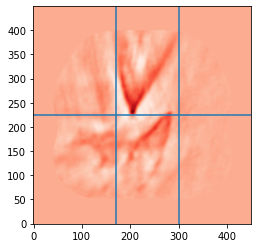

In [4]:
plt.imshow(co_zero_north,cmap='Reds',origin='lower')
plt.axvline(170) 
plt.axvline(300) 
plt.axhline(225)

[8.78444633e+03 2.06889737e+02 6.54071894e+00]
8409.304833984375
[208]
[5.58203804e+03 1.99660277e+02 3.12523002e+00]
5510.050634765625
[199]
[5.35419483e+02 8.47097223e-01 4.84604648e-01]


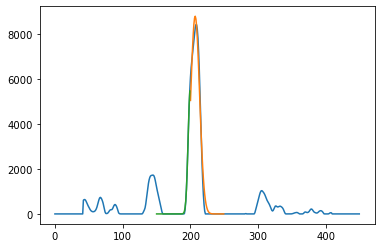

In [5]:
#Fitting Gausian to one curve first

cut = co_zero_north[240:250,:]
cut[cut<0]=0
avg_cut = np.mean(cut,axis=0)

plt.plot(range(450),avg_cut)

#Trying to plot Gaussian    

def Gauss(x,amp,mean,sigma):
    f = amp*np.exp(-(x-mean)**2/(2*sigma**2))
    return f

xdata=np.arange(200,250)
ydata=avg_cut[200:250]

#amp,mean,sigma,offset
p0 = (np.max(ydata),xdata[np.argmax(ydata)],5)

p_opt,p_cov = curve_fit(Gauss,xdata,ydata,p0)
plt.plot(xdata,Gauss(xdata,p_opt[0],p_opt[1],p_opt[2]))

print(p_opt)
print(np.max(ydata))
print(xdata[ydata==np.max(ydata)])

x2data=np.arange(150,200)
y2data=avg_cut[150:200]

p0 = (np.max(y2data),x2data[np.argmax(y2data)],5)

p_opt,p_cov = curve_fit(Gauss,x2data,y2data,p0)
plt.plot(x2data,Gauss(x2data,p_opt[0],p_opt[1],p_opt[2]))

print(p_opt) #use as inital guess
print(np.max(y2data)) #intensity (i)
print(x2data[y2data==np.max(y2data)])

print(np.sqrt(np.diag(p_cov))) #covariance matrix (how they interact with each other)

## Left Hand Gaussian

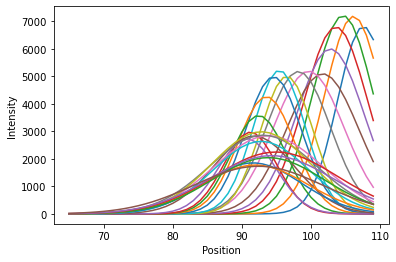

In [6]:
Model_Values = open("North_LeftHand_Model_Values.txt", "w")

Model_Values.write("Left Hand Gaussian \n")
Model_Values.write("y_cut\tfit_pk\tfit_x\tfit_s\tfit_pk_e\tfit_x_e\tfit_s_e\tx_c\tpk_c\n")
#50,250
off_x3 = 90
off_x4 = 200


ycut_list=[(250+(i*5),250+((i+1)*5)) for i in range(26)]

for ycut in ycut_list:
    cut = co_zero_north[ycut[0]:ycut[1],off_x3:off_x4]
    cut[cut<0]=0
    avg_cut = np.mean(cut,axis=0)
    xdata=np.arange(65,110)
    idata=avg_cut[65:110]
    
    p0 = (np.max(idata),xdata[np.argmax(idata)],5)

    p_opt,p_cov = curve_fit(Gauss,xdata,idata,p0)
    
    #plt.plot(range(175),avg_cut)
    plt.plot(xdata,Gauss(xdata,p_opt[0],p_opt[1],p_opt[2]))
    
    Err =np.sqrt(np.diag(p_cov))
    Model_Values.write("%f\t" % np.mean(ycut))
    Model_Values.write("%f\t%f\t%f\t" % (p_opt[0],p_opt[1]+off_x3,p_opt[2]))
    Model_Values.write("%f\t%f\t%f\t" % (Err[0],Err[1],Err[2]))
    Model_Values.write("%f\t" % (xdata[idata==np.max(idata)]+off_x3))
    Model_Values.write("%f\t" % np.max(idata))
    Model_Values.write("\n")
    
plt.xlabel("Position")
plt.ylabel("Intensity")
Model_Values.close()

In [11]:
ycut_left, xfit_left = np.genfromtxt("North_LeftHand_Model_Values.txt", skip_header = 2, unpack=True, usecols=[0,2])

print(ycut_left)
print(xfit_left)

[252.5 257.5 262.5 267.5 272.5 277.5 282.5 287.5 292.5 297.5 302.5 307.5
 312.5 317.5 322.5 327.5 332.5 337.5 342.5 347.5 352.5 357.5 362.5 367.5
 372.5 377.5]
[197.574439 196.136822 194.618324 193.593398 192.802191 191.682111
 189.66583  188.172069 186.498936 185.425461 184.576707 183.543456
 182.424538 181.220151 180.755121 181.7606   183.873234 183.075841
 182.822825 182.788908 181.582539 181.910078 183.815536 184.947095
 184.293243 182.388929]


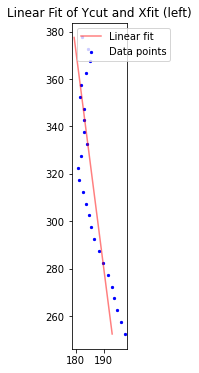

-0.10879588348717906


In [8]:
fit = np.polyfit(ycut_left, xfit_left,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*ycut_left + intercept

fig = plt.figure(figsize=[1,6])
ax = fig.subplots()
ax.plot(fit_eq,ycut_left,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(xfit_left, ycut_left,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear Fit of Ycut and Xfit (left)')
ax.legend()
plt.show()

print(ang_coeff)

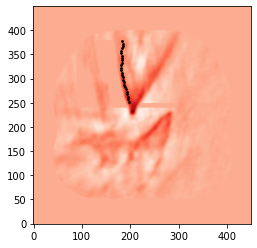

In [9]:
plt.imshow(co_zero_north,cmap='Reds',origin='lower')
plt.scatter(xfit_left,ycut_left, s=3, c='k')

## Right Hand Gaussian

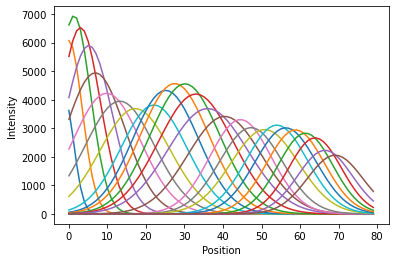

In [10]:
Model_Values = open("North_RightHand_Model_Values.txt", "w")

Model_Values.write("Right Hand Gaussian \n")
Model_Values.write("y_cut\tfit_pk\tfit_x\tfit_s\tfit_pk_e\tfit_x_e\tfit_s_e\tx_c\tpk_c\n")

off_x1 = 220
off_x2 = 345


for ycut in ycut_list:
    cut = co_zero_north[ycut[0]:ycut[1],off_x1:off_x2]
    cut[cut<0]=0
    avg_cut = np.mean(cut,axis=0)
    x2data=np.arange(0,80)
    i2data=avg_cut[0:80]
    
    p0 = (np.max(i2data),x2data[np.argmax(i2data)],5)

    p_opt,p_cov = curve_fit(Gauss,x2data,i2data,p0)
    
    #plt.plot(range(175),avg_cut)
    plt.plot(x2data,Gauss(x2data,p_opt[0],p_opt[1],p_opt[2]))
    
    Err =np.sqrt(np.diag(p_cov))
    Model_Values.write("%f\t" % np.mean(ycut))
    Model_Values.write("%f\t%f\t%f\t" % (p_opt[0],p_opt[1]+off_x1,p_opt[2]))
    Model_Values.write("%f\t%f\t%f\t" % (Err[0],Err[1],Err[2]))
    Model_Values.write("%f\t" % (xdata[idata==np.max(idata)]+off_x1))
    Model_Values.write("%f\t" % np.max(idata))
    Model_Values.write("\n")
    
plt.xlabel("Position")
plt.ylabel("Intensity")

Model_Values.close()

In [8]:
ycut_right, xfit_right = np.genfromtxt("North_RightHand_Model_Values.txt", skip_header = 2, unpack=True, usecols=[0,2])

print(ycut_right)
print(xfit_right)

[252.5 257.5 262.5 267.5 272.5 277.5 282.5 287.5 292.5 297.5 302.5 307.5
 312.5 317.5 322.5 327.5 332.5 337.5 342.5 347.5 352.5 357.5 362.5 367.5
 372.5 377.5]
[218.834279 220.01248  221.332002 222.984477 225.153671 226.860335
 229.796386 233.217833 237.220663 242.065977 245.117156 247.448296
 250.107136 252.955511 256.002198 260.409552 264.521592 267.258253
 270.835735 273.950112 276.260601 278.81245  281.390625 283.883085
 286.463796 289.082421]


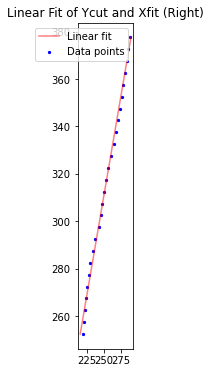

0.6072732746666671


In [9]:
fit = np.polyfit(ycut_right, xfit_right,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*ycut_right + intercept

fig = plt.figure(figsize=[1,6])
ax = fig.subplots()
ax.plot(fit_eq,ycut_right,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(xfit_right, ycut_right,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear Fit of Ycut and Xfit (Right)')
ax.legend()
plt.show()

print(ang_coeff)

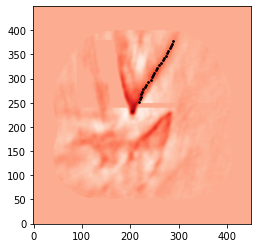

In [10]:
plt.imshow(co_zero_north,cmap='Reds',origin='lower')
plt.scatter(xfit_right,ycut_right, s=3, c='k')
ax.plot(ycut_right, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')

## Together

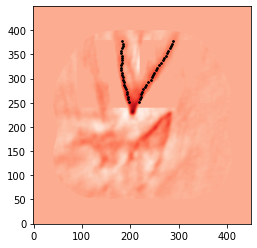

In [14]:
plt.imshow(co_zero_north,cmap='Reds',origin='lower')
plt.scatter(xfit_right,ycut_right, s=3, c='k')
plt.scatter(xfit_left,ycut_left, s=3, c='k')
plt.savefig('Main_Nothern_Gaussian.pdf')